# Homework 7: Studying Employee Attrition With K-Means

Name: Quan Khuc

Student ID: 488453

Collaborators:


## Instructions

In this homework, we will be exploring a more realistic application of clustering. It might be helpful to review **Lab 7 (K-Means Clustering)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. The Initial Centroids Matter!

The $k$-means algorithm is sensitive to the initial starting points. In this section, let's explore this. For a toy dataset with some more clusters.

In [1]:
from utility.util_hw import load_toy, configure_plots
from utility.util_hw import sample_centroids, fit, plot_kmeans

# run this cell twice to have pretty plots
configure_plots()

X, _ = load_toy(500, 5, width=0.07, random_state=4)

### Problem 1.1

Let's take a quick peek at what the data looks like.

**Try this!** Plot the toy data $X$. Make sure that your plot has the necessary components.

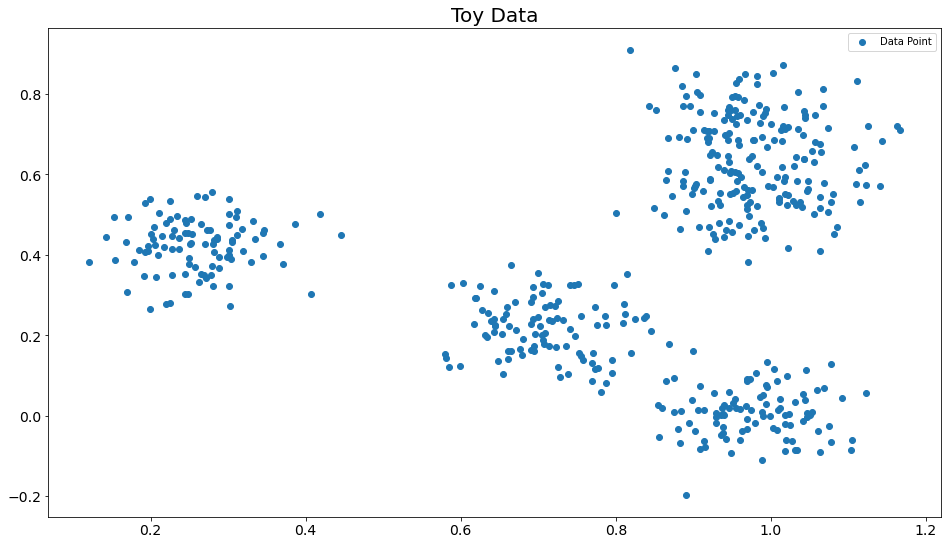

In [2]:
# your code here 
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], label = "Data Point")
plt.title("Toy Data")
plt.legend()

### Problem 1.2

**Try this!** Using the functions `sample_centroids`, `fit`, and `plot_kmeans`, experiment with different `random_state`s to see if you can observe different final centroids depending on the initial starting points. Use the data sampled above and produce two plots in the two code cells provided below; one of them should show a reasonabley nice $k$-means solution. 

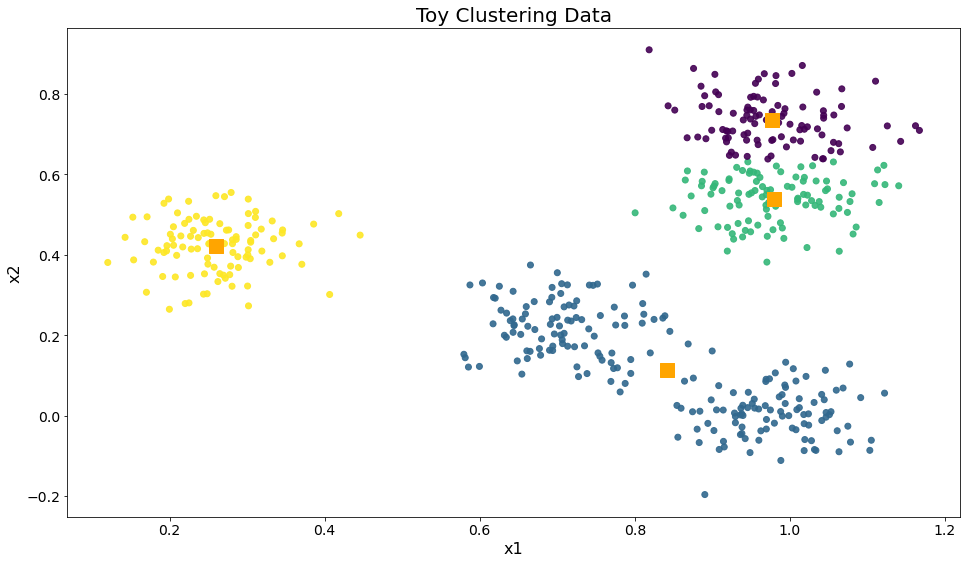

In [3]:
# your code here 
init_centroids = sample_centroids(X, 4, random_state = 3)
centroids, assignments = fit(X, 4, initial = init_centroids)
plot_kmeans(X, centroids, assignments = assignments)

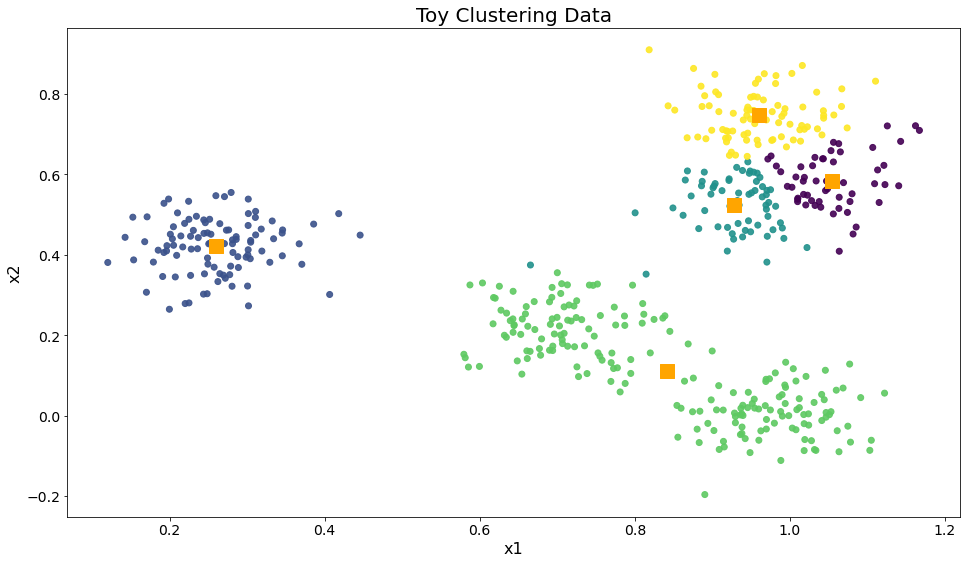

In [4]:
# your code here 
init_centroids = sample_centroids(X, 5, random_state = 10)
centroids, assignments = fit(X, 5, initial = init_centroids)
plot_kmeans(X, centroids, assignments = assignments)

### Problem 1.3

**Write-up!** What might be causing this to happen? How might we better choose our initial centroids? 

**Your response here:** 
 - When I increased the random_state from 4 to 10, the centroids seem to be more inaccurately spreaded than the centroids generated by a lower random_state. Therefore, it is probably better to pick a low random_state that is closed to the number of clusters. When I decreased the value of random_state that is significantly less than number of clusters (I tried with 5 clusters and random_state was 2), the centroids seem to be inaccurately spreaded. Therefore, I think there is a correlation between number of clusters and random_state so that their values have to be close to one another to avoid inaccuarately spreaded centroids. I think the best spreaded clusters are when the random_state is one less than the number of centroids
 - In this randomly generated toy dataset and from the plot, I think 5 clusters is the right number of clusters. However, one can argue that the right number of centroids can be different than 5. When I ploted 4 centroids with random_state = 3, the clusters seem accurately spreaded.

## 2. Using `sklearn` for $k$-means 

In this section, we will explore the [$k$-means model from `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and discuss some of the additional features supplied by their implementation. Before we begin, it is suggested that you work through Lab 7 if you haven't already as we will assume familiarity with the terms used there.

### Looking Into the Model

Now let's create a new $k$-means model and learn about it's interface. In general, you will find that the $k$-means model from `sklearn` shares a lot of the same methods as the other models that we have looked at. However, there are some differences that are notable.

In [5]:
from sklearn.cluster import KMeans

model = KMeans()

### Problem 2.1

**Write-up!** Use the IPython `?` operator to answer the following question: how do you specify the number of clusters you would like to fit?

In [6]:
# use this cell to explore
?KMeans

**Your response here:** 
I can specify the number of clusters to form as well as the number of centroids to generate by specifying n_clusters to be the number of clusters that I would like to fit.

### Problem 2.2

**Write-up!** Use the IPython `?` operator to answer the following questions: How does the model initialize centroids by default? How does it work and why is it better than randomly choosing random starting centroids?

In [7]:
# use this cell to explore
?KMeans

**Your response here:** 
Source: https://www.geeksforgeeks.org/ml-k-means-algorithm/
 - The function initializes the cluster centers in a smart wat to speed up convergence
 - The function runs the k-means++ algorithm 10 times to avoid choosing the inaccurately spreaded centers, which is the drawback of the k-means algorithm chooses number of clusters randomly. In other words, the k-mean algorithm may randomly choose centroids that are way too fat from most of the data points, which ultimately results in a centroid that may not have any points associated to it. The function gives us a choice of deciding number of times that the k-means algorithm repeated, if we don't want the default parameter, which is the 10 times.
 - The k-mean++ algorithm randomly selected a first random centroid from the data points. Then, for each data point, it calculates the distance between the chosen centroid to the data point. Finaly, the algorithm selects the next centroid so that the probabilty of choosing a centroid is directly proportional to its distance to the nearest previously chosen centroid. By selecting centroids in this step-wise method, there will exist centroids that cover "most extreme" data points as well as centroids that cover "more common" data points.
 - It is better than choosing random starting centroids because this k-means++ algorithm can mitigate the drawbacks of k-means algorithm.

### Problem 2.3

**Write-up!** Use the IPython `?` operator to answer the following questions: How does the model decide that the centroids have converged? Why might we need to adjust this based on our input data.

In [8]:
# use this cell to explore
?KMeans

**Your response here:** 
 - The function has max_iter and tol to have a stop to iterations of k-means algorithm. If the algorithm runs for a selected maximum number of iterations and has its calculated tolerance with regards to Frobenius norm to be less than the selected tolerance, the algorithm stops. 
 - We might need to adjust these parameters when the data contains a lot of data points that are far off from others. If the algorithm stops because of those chosen parameters, the center of clusters may not the means of the points in each cluster. Moreover, labels and cluster centers may not be consistent. This could lead to wrong predictions by using this clustering model.

### Clustering the Toy Data with `sklearn`

Let's try using `sklearn` to cluster our data.

### Problem 3.1

**Try this!** Create and fit a _new_ `KMeans` model of our data with the default arguments except for `random_state` which should be set to 11. _Be sure to store the fit centroids and assignments in variables for use later._

In [9]:
# your code here 
import numpy as np
kmeans = KMeans(random_state = 11).fit(X)
centroids = kmeans.cluster_centers_
assignments = kmeans.labels_
np.unique(assignments, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 51,  63, 100,  84,  52,  53,  46,  51], dtype=int64))

**Write-up!** How many centroids were fit by the model? How many points were assigned to each cluster?

**Your response here:** 
There are 8 centroids that were fit by the model. Each cluster has 56, 63, 100, 84, 52, 53, 46, 51 counts respectively.

### Problem 3.2

**Try this!** Create a plot showing the centroids that were produced by the model and the data points colored by their cluster assignment. Be sure to include any necessary plot components and remember that presentation matters.

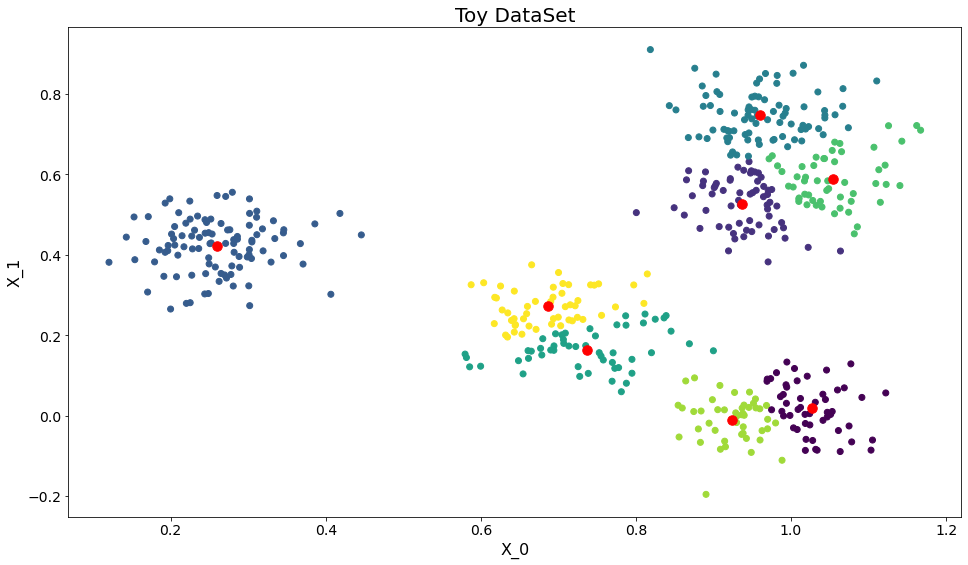

In [10]:
# your code here
ax = plt.subplot()
ax.scatter(X[:,0], X[:,1], c=assignments)
ax.scatter(centroids[:,0], centroids[:,1], s=90, color = 'red')
plt.title('Toy DataSet')
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

**Write-up!** Given this plot, do you think this is a reasonable clustering of the data?

**Your response here:** 
I think a reasonable number of cluster in this plot is 4. Having 8 clusters in this plot is not very reasonable.

### Problem 3.3

Consider the Sum of Squared Distances $SSD_j$ as the sum of all points in the $j$th cluster to its corresponsing $$SSD_j = \sum_{i=1}^{n} \gamma_{ij} \;d(x_i,c_j)^2,$$
where $\gamma_{ij}$ is 1 if $x_i$ belongs to cluster $j$ and 0 otherwise. 

Then, the objective function that $k$-means optimizes is the sum of the $SSD_j$ over all clusters. This means that, we want to find clusters of points that are close to one another. We can estimate how close the cluster points are to one another by measuring how far each point assigned to the cluster is from its center.


**Try this!** Use the elbow method described in both lecture and Lab 7 to find a good clustering for our data. Produce a plot that shows the model performance $SSD^{(k)}$ as a function of $k$, where $SSD^{(k)} = \sum_{j=1}^k SSD_j$.  Make sure to create new models when appropriate.

74.80700351426964 0
3.5849142395467424 0
40.738108023161985 1
7.532106338822387 0
11.117020578369129 1
11.915989632624903 2
0.9538151782322116 0
4.538729417778954 1
5.337698472034727 2
6.097007556763145 3
0.7593090847284183 0
1.622467281787574 1
2.421436336043348 2
3.37525151427556 3
4.151763180359529 4
0.7593090847284183 0
1.117986811453486 1
1.9169558657092602 2
2.8707710439414718 3
3.511629557481937 4
3.7618453306353223 5
0.6902534169465372 0
1.1830925509498935 1
1.9820616052056677 2
2.452618275912748 3
2.683990351234219 4
3.1958304438684864 5
3.3815126211601965 6
0.5560612280681003 0
0.8988535956331407 1
1.608144673271185 2
1.9242857536564089 3
2.248151261065373 4
2.594558112390575 5
2.8993537285405364 6
3.0933960963161673 7
0.18875572480605418 0
0.7005958174403214 1
1.01075145549335 2
1.398825400543287 3
1.8916645345466434 4
2.153214113953759 5
2.39241814859036 6
2.5934960988616216 7
2.8248681741830928 8


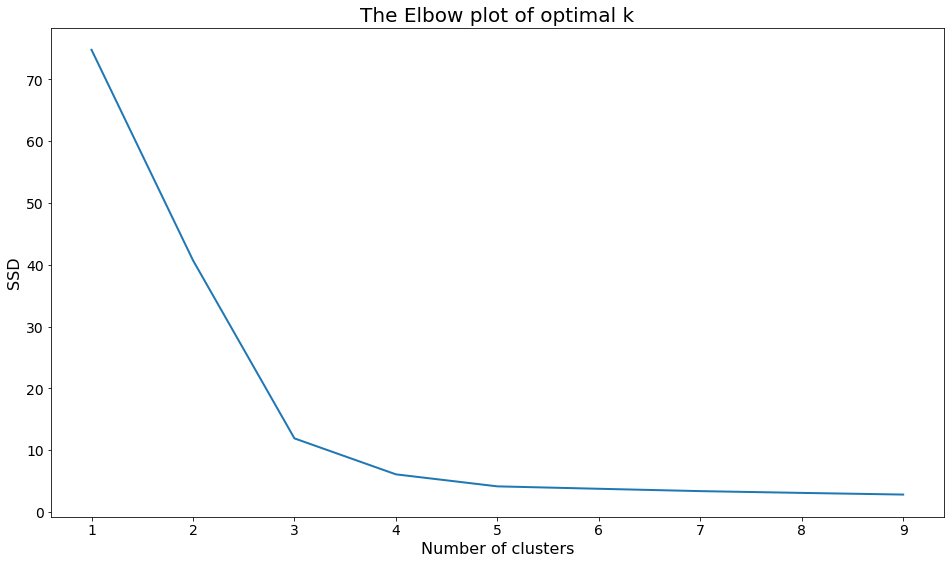

In [15]:
from utility.util_hw import squared_distance

# Source: https://www.scivision.dev/matplotlib-force-integer-labeling-of-axis/. I used this source to force the x_axis to only show integers
#         https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html. I used this source to set x_axis label
#         https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html. I used this source to set y_axis label
# your code here 
def elbow_method(data, k_max):
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MaxNLocator
    distances = []
    for k in range(1,k_max):
        kmeans = KMeans(n_clusters=k).fit(data) #rebuild the model for each value of k and consequentially recalculate assignments and centroids according to k
        assignments = kmeans.labels_
        centroids = kmeans.cluster_centers_
        distance = 0
        for i in np.unique(assignments): #I can't use enumerate method here because the assignment array increases its size by one and its value increments by 1
            distance_to_point = squared_distance(data, centroids[i,:])
            distance += np.sum(np.where(assignments == i, distance_to_point, 0)) #if the squared distance is multiplied with 0, it is 0
            print(distance, i)
        distances.append([k,distance])
    distances = np.array(distances)
    ax = plt.figure().gca()
    ax.plot(distances[:,0], distances[:,1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title('The Elbow plot of optimal k')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('SSD')

elbow_method(X,10)

**Write-up!** State which $k$ you would choose and explain why. 

**Your response here:** 
From the plot, I would choose K to be 4 because it is the smallest number of clusters so that its corresponding SSD is lower than 10. For me, my tolerance for SSD is within a range of 10.

## 3. Tackling Employee Attrition


A real problem that Human Resources (HR) departments in companies across the work would like to address is employee attrition, or turnover. They would like to reduce the number of employees who leave the company as hiring new employees is expensive. In this section, we would like to see if we can make use of $k$-means to identify patterns in employee attrition so that we might suggest which areas an HR department should intervene in.

To show off there shiny Watson platform, IBM released a (fictional) [sample dataset](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) in 2015 containing employee statistics and whether or not they left the company. We'll use this dataset in our own exercise.

In [295]:
import pandas as pd

data = pd.read_csv('./utility/data/HR-Employee-Attrition.csv')

### Problem 4.1

With our problem in mind, the next thing to do is to acquire and process our data.

**Try this!** Describe the data in `HR-Employee-Attrition.csv` (`data`), answering questions including, but not limited to, these: How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> `Hint` Consider the steps of EDA; what would you like to know about this dataset. 

In [296]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

**Your response here:** 
 - There are 1470 examples in this dataset and 35 features
 - Features take in either categorical or numerical variable

### Problem 4.2

Now that we have a feel for what data we have, let's do some data wrangling.

**Try this!** In the cells below (feel free to add more as you need them), explain and perform the steps that you need to prepare this data for further analysis. Make sure that your analysis and work is presented well and effectively communicates your work.
> In this process, consider whether each feature is informative (eg. EmployeeNumber might not be) and remove those that are not from your dataset. `Hint` You can use the `pandas.DataFrame.drop` function.

In [297]:
# your code here 
data = data.dropna()
# I don't think that EmployeeCount, Over18,EmployeeNumber are important to build a model to intervine employee from leaving the company
not_interested = ['EmployeeCount', 'Over18', 'EmployeeNumber']
data.drop(not_interested, axis = 1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,80,0,17,3,2,9,6,0,8


### Problem 4.3

Another step to do in our data processing phase is to replace categorical variables that are represented as strings with an enumeration. For example, `'Attrition'` has `'Yes'` and `'No'` values that we would like to encode as `1` and `0` respectively.

**Try this!** In the following cell, [`replace`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) the string values in categorical variables with enumerations. Make uses of the `encoded` `DataFrame` which is a copy of `data`. `Hint` You can use the `unique` and `enumerate` functions to help you do this.

In [298]:
encoded = data.copy()

# Source: https://medium.com/analytics-vidhya/categorical-variable-encoding-techniques-17e607fe42f9. I used this source to create the two helper functions below
# your code here 
# return a dictionary that has key as category and values as number
def find_category_mappings(data, variable):
    return {k: i for i, k in enumerate(data[variable].unique())}

# Returns the column after mapping with dictionary
def integer_encode(data,variable, ordinal_mapping):
    data[variable] = data[variable].map(ordinal_mapping)

categorical_data = encoded.select_dtypes(include=['object'])
categorical_names = categorical_data.columns
for categorical_name in categorical_names:
    mappings = find_category_mappings(encoded,categorical_name)
    integer_encode(encoded,categorical_name, mappings)
    
assert encoded.shape == data.shape, 'The encoded version of `data` should have the same shape'
assert np.all(encoded.dtypes == 'int64'), 'All values in `encoded` should be integers'

### Problem 4.4

Now that we have a processed dataset, let's move on to forming clusters with $k$-means. Normally, we would do some EDA here, but in the interest of time, we will forgo that part of the data science workflow. If you want to, we still encourage you to do so.

That said, we will need to prepare an $X$ matrix of our dataset. At this point, we will drop the `'Attrition'` column from our dataset. We will also [scale our data](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling). 

In [299]:
from sklearn.preprocessing import scale

X = scale(np.float64(encoded.copy().drop('Attrition', axis=1)))

**Try this!** In the cell below, build an elbow plot for $k \in [1, 21]$ as you did in [Problem 3.3](#Problem-3.3).

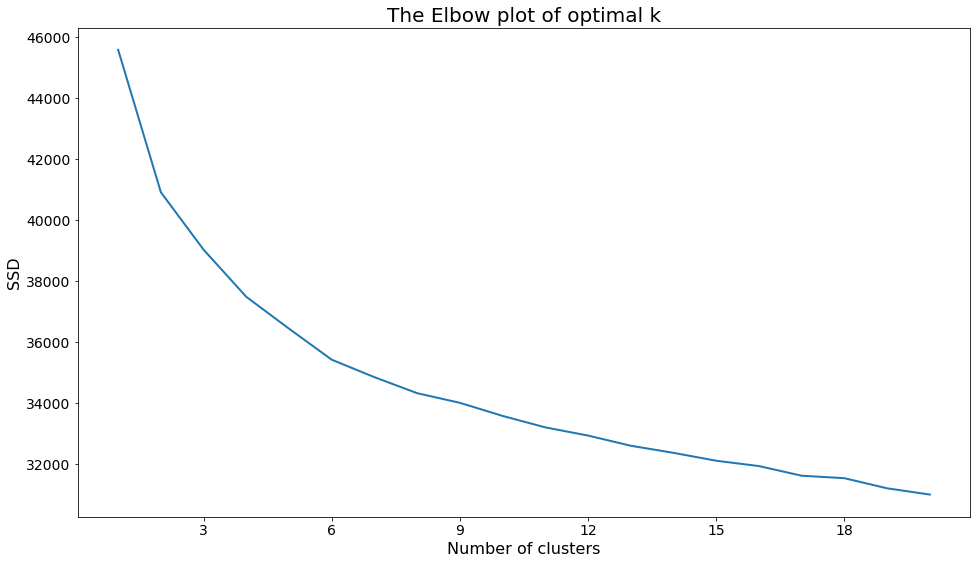

In [300]:
# your code here 
elbow_method(X, 21)

**Write-up!** State which 𝑘 you would choose and explain why.

**Your response here:** 
From the plot above, I picked k to be 6 because I noticed a significant drop from SSD = 44000 to SSD = 36000. Even though k increases up to 20, the drop is only from SSD = 36000 to SSD = 32000. Adding more clusters and having no significant drop after k = 6 may cause inaccurate predictions

### Problem 4.5

**Try this!** Using the $k$ you selected in [Problem 4.4](#Problem-4.4), create and fit a new model. Remember to save the cluster assignments and centroids.

In [302]:
# your code here 
kmeans = KMeans(n_clusters=6).fit(X)
assignments = kmeans.labels_
centroids = kmeans.cluster_centers_

### Problem 4.6

Now that we have cluster assignments from $k$-means, we need to analyze the significance of each cluster. To do that, let's return to our original DataFrame, `data`.

In the following cell, we add our cluster assignments to `data`. We also compute a pivot table which provides a summary of each cluster.

In [304]:
data['Cluster'] = assignments
pivot = data.pivot_table(index='Cluster', aggfunc=np.mean)
pivot

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.272727,872.583333,8.810606,3.174242,1,939.871212,2.727273,67.590909,2.825758,3.765152,2.742424,14214.439394,15671.484848,4.537879,15.053030,3.098485,2.742424,80,0.734848,22.659091,2.598485,2.742424,5.098485,3.159091,1.303030,2.825758
1,36.620209,774.296167,9.519164,3.041812,1,1036.139373,2.804878,62.425087,2.783972,2.142857,2.790941,6263.463415,13981.585366,1.867596,13.853659,3.003484,2.547038,80,0.815331,12.306620,2.895470,2.783972,10.641115,7.655052,4.006969,7.592334
2,35.493261,873.229111,9.582210,3.048518,1,1095.164420,2.838275,65.514825,2.730458,1.566038,2.803235,4401.746631,13775.663073,3.024259,14.129380,3.000000,2.754717,80,1.452830,7.792453,2.811321,2.725067,4.032345,2.296496,0.784367,2.237197
3,32.243094,739.552486,8.522099,2.610497,1,1012.124309,2.618785,68.563536,2.690608,1.403315,2.640884,3851.132597,14988.859116,2.433702,14.027624,3.000000,2.787293,80,0.124309,6.256906,2.809392,2.781768,3.447514,2.116022,0.806630,2.044199
4,34.978836,802.455026,9.724868,2.772487,1,963.052910,2.640212,65.714286,2.719577,1.656085,2.708995,4695.592593,13937.862434,2.465608,21.719577,4.000000,2.597884,80,0.798942,8.735450,2.788360,2.761905,5.756614,3.899471,1.687831,3.798942
5,46.085271,766.666667,8.837209,3.023256,1,1010.891473,2.604651,65.705426,2.635659,4.031008,2.635659,15277.240310,13859.821705,2.751938,15.271318,3.178295,2.883721,80,0.782946,25.201550,2.744186,2.775194,21.263566,9.674419,7.689922,9.465116


**Try this!** Compute the percentage of total attrition accounted for by each cluster and store the result in `pivot['% of Attrition']`.

In [311]:
# your code here 
_, each_assignment_count = np.unique(assignments[data['Attrition'] == 'Yes'], return_counts=True)
pivot['% of Attrition'] = each_assignment_count/np.sum(each_assignment_count) *100

assert pivot['% of Attrition'].sum() == 100, 'Sum of percentage attrition should be 1'

### Problem 4.7

Let's take a look at the results and identify potential areas for intervention to suggets to the HR department.

In [312]:
pivot.sort_values(by='% of Attrition', axis=0).T

Cluster,0,5,1,4,2,3
Age,48.272727,46.085271,36.620209,34.978836,35.493261,32.243094
DailyRate,872.583333,766.666667,774.296167,802.455026,873.229111,739.552486
DistanceFromHome,8.810606,8.837209,9.519164,9.724868,9.582210,8.522099
Education,3.174242,3.023256,3.041812,2.772487,3.048518,2.610497
EmployeeCount,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeNumber,939.871212,1010.891473,1036.139373,963.052910,1095.164420,1012.124309
EnvironmentSatisfaction,2.727273,2.604651,2.804878,2.640212,2.838275,2.618785
HourlyRate,67.590909,65.705426,62.425087,65.714286,65.514825,68.563536
JobInvolvement,2.825758,2.635659,2.783972,2.719577,2.730458,2.690608
JobLevel,3.765152,4.031008,2.142857,1.656085,1.566038,1.403315


**Write-up!** Describe the clusters produced and interpret their meaning. What makes each one a separate cluster? Is there anything that stands out with respect to attrition rate? What might you suggest HR look into to improve employee retention?

**Your response here:** 
 - The highest attrition rate calculated is from the 3rd cluster, which has about 42.2%. Cluster 1, 4, and 2 have very similar percentages of attrition, which are about 16%.
 - Monthly Income, Age and JobLevel make each separate cluster from others. From the data, it seems that a group of employees who are 46+ have a significant better income than a group of employees who are below 36. However, when I examine the average performance rating of each cluster, its value is very similar. So I thought that there exist a group of young employees who work at the company for couple years want better pay roles, even though they know that they are doing their job as well as others who are older and may have experience. Concisely, I believe the issue is that a lot of younger employees wanted to leave the company for the fact that there is a group of older employees who are about 45+ and have the same about the same number of years working at the company, but have a significantly better pay role. Therefore, this group of younger employees decided to leave the company to look for better opprtunity!.
 - Another interesting thing is that this group who wants to get a better opportunity may not be dissatified with their job or their working enviroment. I think that they are nonchalant about their job or their working environment but just want to have a better pay roles!
 - I suggested HR to pay more attention at a group of employees who are about 35 and conduct a survey to find further reasons that they want to leave the company